<h1 style='color:lightgreen'>DBSCAN</h1>
</br>

<img style='margin-left:20px;width:500px' src='https://github.com/Cloudy0x/ML/blob/main/img/example.gif?raw=true'>

</br>

In [2]:
import pandas as pd 
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn import preprocessing

import matplotlib.pyplot as plt

</br>
<h3 style='color:orange'> Data </h3>
</br>

In [38]:
x, y = make_blobs(n_samples=1000, centers=[[0, 0], [0, 5], [5, 5]], cluster_std=[1.0, 0.5, 1.0])

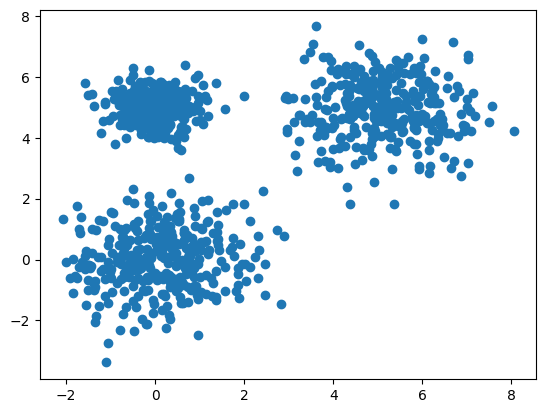

In [39]:
plt.scatter(x[:,0], x[:,1])
plt.show()

</br>
<h2 style='color:cyan'> By sklean </h2>
</br>

</br>
<h3 style='color:orange'> Model </h3>
</br>

In [40]:
dbscan_model = DBSCAN(eps=0.5, min_samples=5) 
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.

labels = dbscan_model.fit_predict(x)
labels[0:10]

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0])

In [41]:
n_clusters = set(labels)# number of clusters by dbscan
n_clusters

{-1, 0, 1, 2}

</br>
<h3 style='color:orange'> Show </h3>
</br>

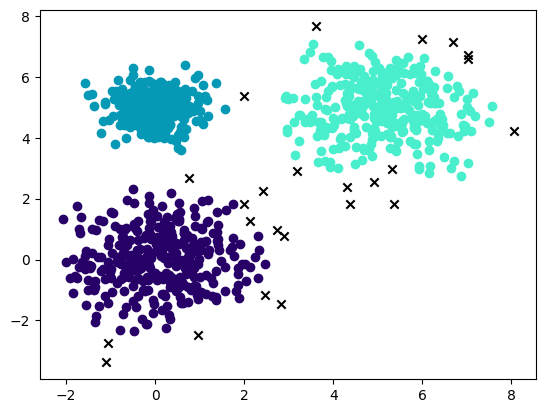

In [42]:
color = {}

# get colors
for i in n_clusters:
    color[i] = np.random.rand(3,)

# draw data points
for i in n_clusters:
    
    if i != -1 : 
        plt.scatter(x[labels == i,0], x[labels == i,1], color=color[i])
    else :  # sample with -1 label are out
        plt.scatter(x[labels == i,0], x[labels == i,1], color='black', marker='x')
        
        

plt.show()

</br>
<h2 style='color:cyan'> By myself </h2>
</br>

</br>
<h3 style='color:orange'> Model </h3>
</br>

In [15]:
class dbscan:
    def __init__(self, epsilons, min_samples):
        self.eps = epsilons
        self.min_samples = min_samples

    def fit(self, x):

        self.visited = set()
        self.labels = [None] * len(x)
        self.cluster_id = 0

        for i in range( len(x) ):
            if not i in self.visited:
                self.visited.add(i)
                neighbors = self._get_neighbors(x, i)
                
                if len(neighbors) < self.min_samples:
                    self.labels[i] = -1
                else :
                    self._expand_cluster(x, i, neighbors)
                    

    def _get_neighbors(self, x, i):
        neighbors = []
        
        for j in range( len(x) ):
            if np.linalg.norm(x[i] - x[j]) < self.eps:
                neighbors.append(j)
                
        return neighbors

    def _expand_cluster(self, x, i, neighbors):
        self.cluster_id += 1
        self.labels[i] = self.cluster_id

        for j in neighbors:
            if not j in self.visited:
                self.visited.add(j)
                
                new_neighbors = self._get_neighbors(x, j)

                if len(new_neighbors) >= self.min_samples:
                    neighbors.extend(new_neighbors)

            if self.labels[j] is None:
                self.labels[j] = self.cluster_id
        

</br>
<h3 style='color:orange'> clustering </h3>
</br>

In [43]:
model = dbscan(epsilons=0.5, min_samples=5)
model.fit(x)

</br>
<h3 style='color:orange'> Show </h3>
</br>

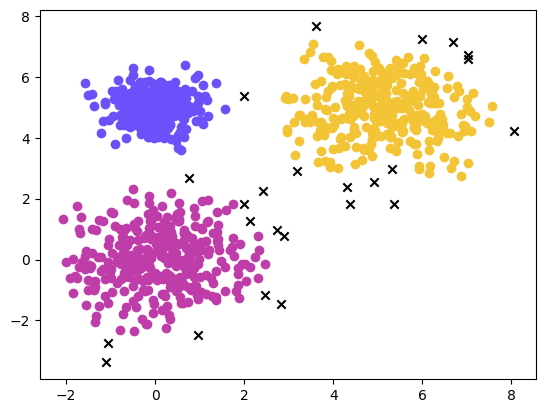

In [44]:
n_clusters = set(model.labels)# number of clusters by dbscan
_labels = np.array(model.labels)

color = {}

# get colors
for i in n_clusters:
    color[i] = np.random.rand(3,)

# draw data points
for i in n_clusters:
    
    if i != -1 : 
        plt.scatter(x[_labels == i,0], x[_labels == i,1], color=color[i])
    else :  # sample with -1 label are out
        plt.scatter(x[_labels == i,0], x[_labels == i,1], color='black', marker='x')
        
        

plt.show()